# Using Dagitty in the Analysis of Impact of 401(k) on Net Financial Wealth


In [1]:
#install and load package

install.packages("dagitty")
install.packages("ggdag")
library(dagitty)
library(ggdag)


Installing package into ‘/home/runner/work/_temp/Library’
(as ‘lib’ is unspecified)



Installing package into ‘/home/runner/work/_temp/Library’
(as ‘lib’ is unspecified)




Attaching package: ‘ggdag’




The following object is masked from ‘package:stats’:

    filter




Graphs for 401(K) Analsyis


Here we have
  - $Y$ -- net financial assets;
  - $X$ -- worker characteristics (income, family size, other retirement plans; see lecture notes for details);
  - $F$ -- latent (unobserved) firm characteristics
  - $D$ -- 401(K) eligibility, deterimined by $F$ and $X$

## State one graph (where F determines X) and plot it

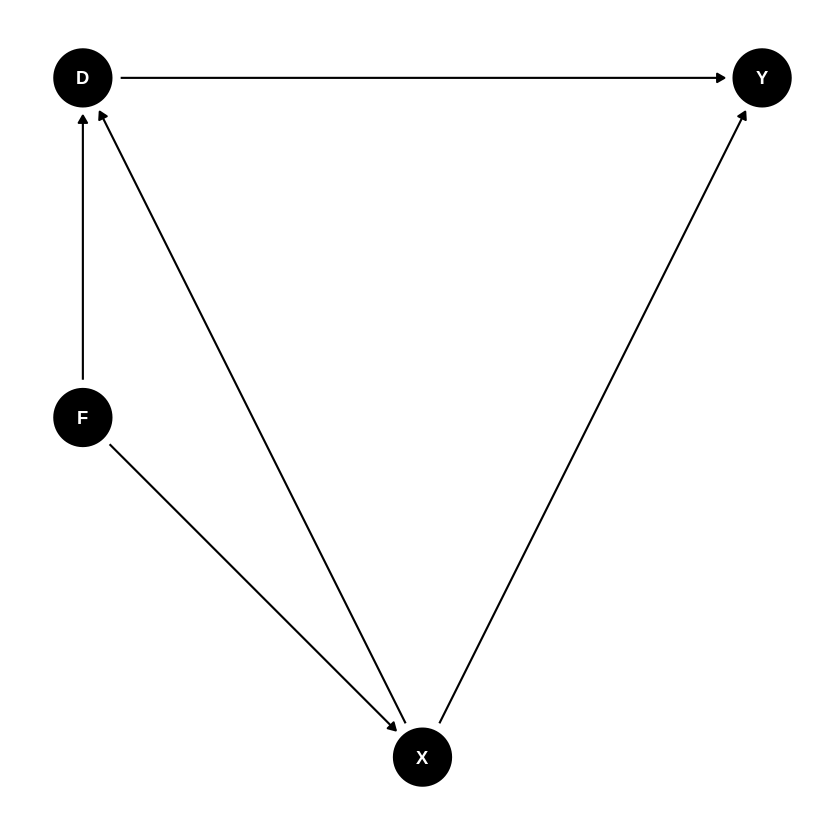

In [2]:
#generate a DAGs and plot them

G1 = dagitty('dag{
Y [outcome,pos="4, 0"]
D [exposure,pos="0, 0"]
X [confounder, pos="2,-2"]
F [uobserved, pos="0, -1"]
D -> Y
X -> D
F -> X
F -> D
X -> Y}')


ggdag(G1)+  theme_dag()

List minimal adjustment sets to identify causal effecs $D \to Y$



In [3]:
adjustmentSets( G1, "D", "Y",effect="total" ) 

{ X }

What is the underlying principle? 

Here condition on X blocks backdoor paths from Y to D (Pearl).  Dagitty correctly finds X (and does many more correct decisions, when we consider more elaborate structures. Why do we want to consider more elaborate structures? The very empirical problem requires us to do so!

Another Graph (wherere $X$ determine $F$):

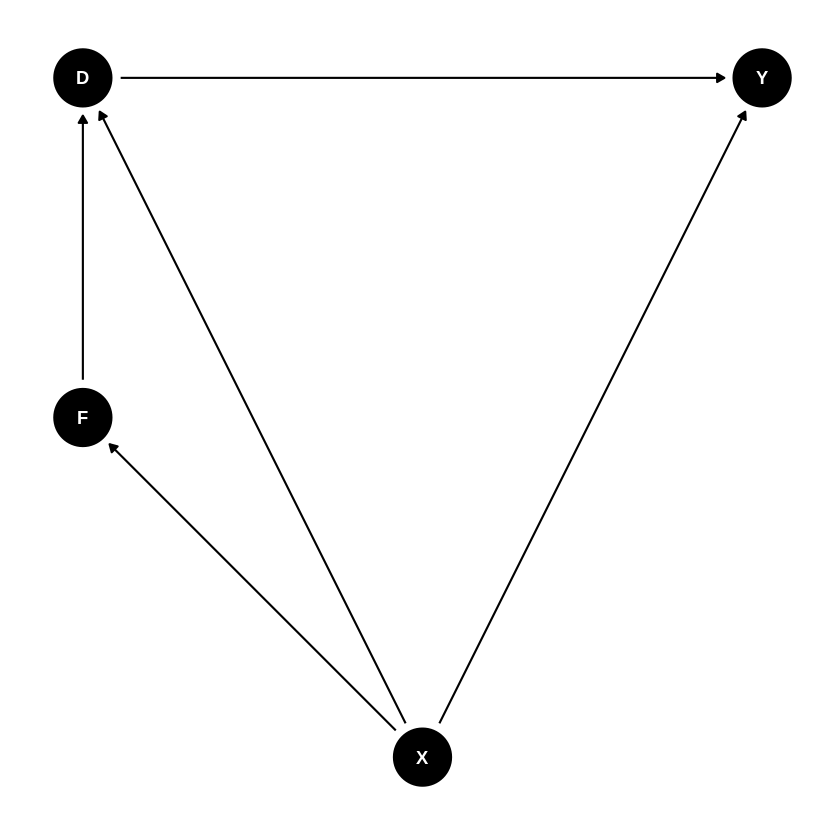

In [4]:
#generate a couple of DAGs and plot them

G2 = dagitty('dag{
Y [outcome,pos="4, 0"]
D [exposure,pos="0, 0"]
X [confounder, pos="2,-2"]
F [uobserved, pos="0, -1"]
D -> Y
X -> D
X -> F
F -> D
X -> Y}')


ggdag(G2)+  theme_dag()

In [5]:
adjustmentSets( G2, "D", "Y", effect="total" )


{ X }

One more graph (encompassing previous ones), where (F, X) are jointly determined by latent factors $A$. We can allow in fact the whole triple (D, F, X) to be jointly determined by latent factors $A$.

This is much more realistic graph to consider.

{ X }

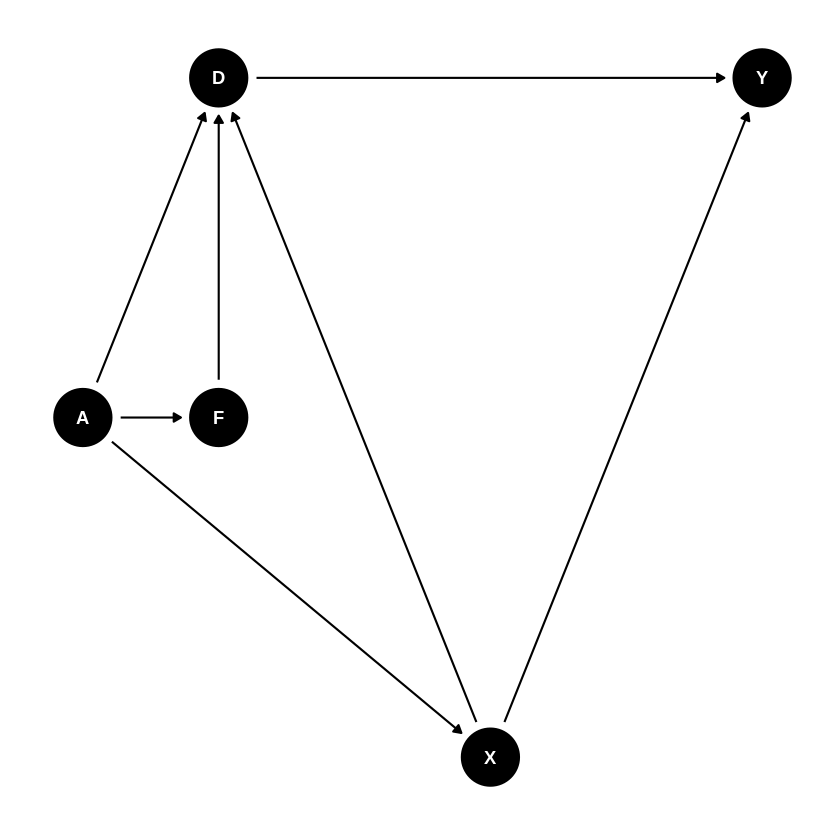

In [6]:
G3 = dagitty('dag{
Y [outcome,pos="4, 0"]
D [exposure,pos="0, 0"]
X [confounder, pos="2,-2"]
F [unobserved, pos="0, -1"]
A [unobserved, pos="-1, -1"]
D -> Y
X -> D
F -> D
A -> F
A -> X
A -> D
X -> Y}')

adjustmentSets( G3, "D", "Y", effect="total"  ) 

ggdag(G3)+  theme_dag()

Threat to Idenitification: What if $F$ also directly affects $Y$? (Note that there are no valid adjustment sets in this case)

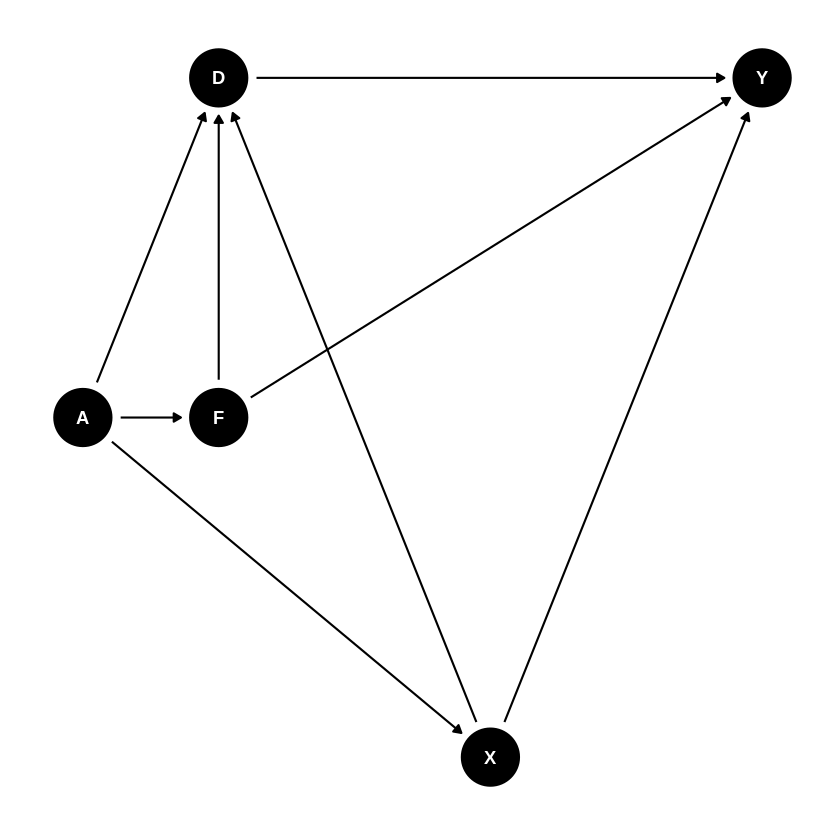

In [7]:
G4 = dagitty('dag{
Y [outcome,pos="4, 0"]
D [exposure,pos="0, 0"]
X [confounder, pos="2,-2"]
F [unobserved, pos="0, -1"]
A [unobserved, pos="-1, -1"]
D -> Y
X -> D
F -> D
A -> F
A -> X
A -> D
F -> Y
X -> Y}')


ggdag(G4)+  theme_dag()

In [8]:
adjustmentSets( G4, "D", "Y",effect="total"  )


Note that no output means that there is no valid adustment set (among observed variables)

## How can F affect Y directly? Is it reasonable?

Introduce Match Amount $M$ (very important mediator, why mediator?). $M$ is not observed.  Luckily adjusting for $X$ still works if there is no $F \to M$ arrow.

{ X }


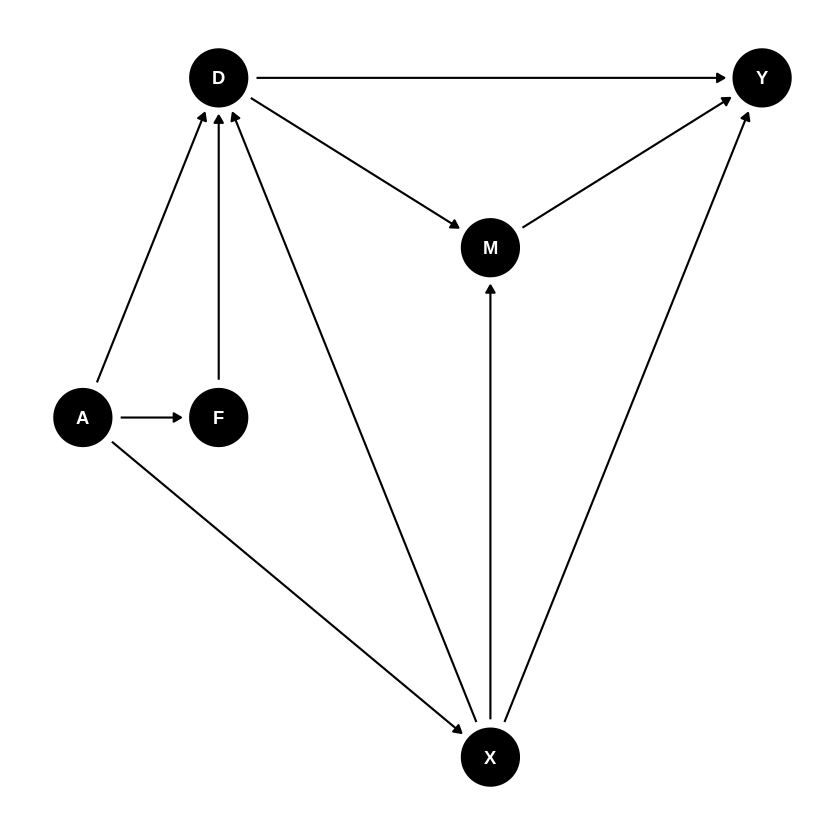

In [9]:
G5 = dagitty('dag{
Y [outcome,pos="4, 0"]
D [exposure,pos="0, 0"]
X [confounder, pos="2,-2"]
F [unobserved, pos="0, -1"]
A [unobserved, pos="-1, -1"]
M [unobserved, pos="2, -.5"]
D -> Y
X -> D
F -> D
A -> F
A -> X
A -> D
D -> M
M -> Y
X -> M
X -> Y}')

print( adjustmentSets( G5, "D", "Y",effect="total"  ) )

ggdag(G5)+  theme_dag()

If  there is $F \to M$ arrow, then adjusting for $X$ is not sufficient.

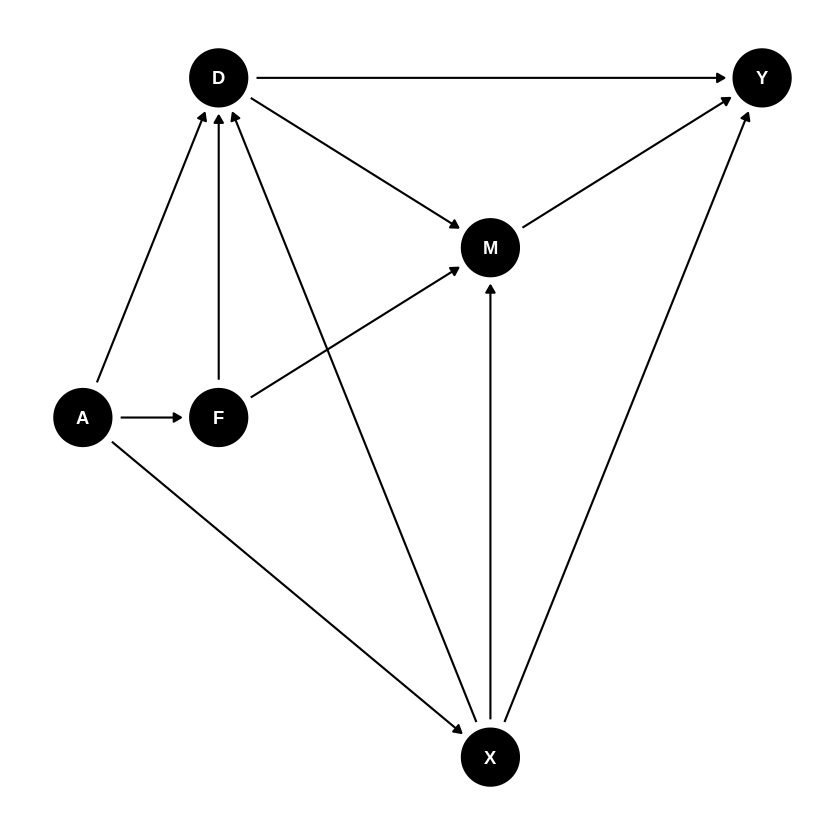

In [10]:
G6 = dagitty('dag{
Y [outcome,pos="4, 0"]
D [exposure,pos="0, 0"]
X [confounder, pos="2,-2"]
F [unobserved, pos="0, -1"]
A [unobserved, pos="-1, -1"]
M [uobserved, pos="2, -.5"]
D -> Y
X -> D
F -> D
A -> F
A -> X
D -> M
F -> M
A -> D
M -> Y
X -> M
X -> Y}')

print( adjustmentSets( G6, "D", "Y" ),effect="total"  )

ggdag(G6)+  theme_dag()